# Gradient Descent

## Introduction

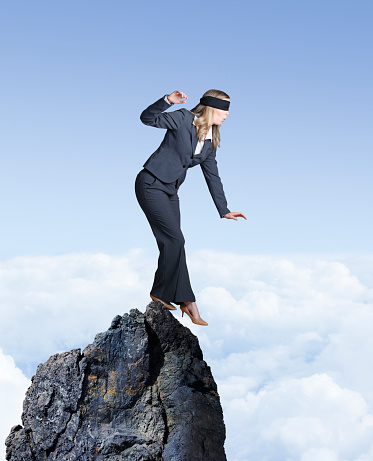

<div style="line-height:1.75;background:#3464a2;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-question" style="font-size:40px;color:#e6f1ff;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#e6f1ff;padding:20px;border-radius:0px 0px 5px 5px">
You're standing blindfolded on top of a mountain and you want to find the quickest way down. What would you do?<br>
</p></div>

<p style="line-height:1.75;font-size:16px">
Gradient descent is one of the most popular algorithms to perform optimization and by far the most common way to optimize neural networks. It is an iterative optimization algorithm used to find the minimum value for a function.
The intutition behind it is rather simple. Let's say we're trying to fit a linear regression model, we know that the cost function Mean Square Error looks like this:
</p><p><center><h3>
$MSE=\frac{1}{n}\sum\limits_{i=1}^{n}(y_i - \hat{y_i})^2$
</h3>
<p style="line-height:1.75;font-size:16px">
Since we want to minimize the cost, we need to find the minimum point of cost function, but how do we do that? We start at a random point on the cost function and make our way down. How do we decide which way to go? That's where the gradient comes into play. If we calculate the gradient for the current point we're on, we'll know which way is down. Once we know which way is down we simply take a step in that direction and repeat the process.

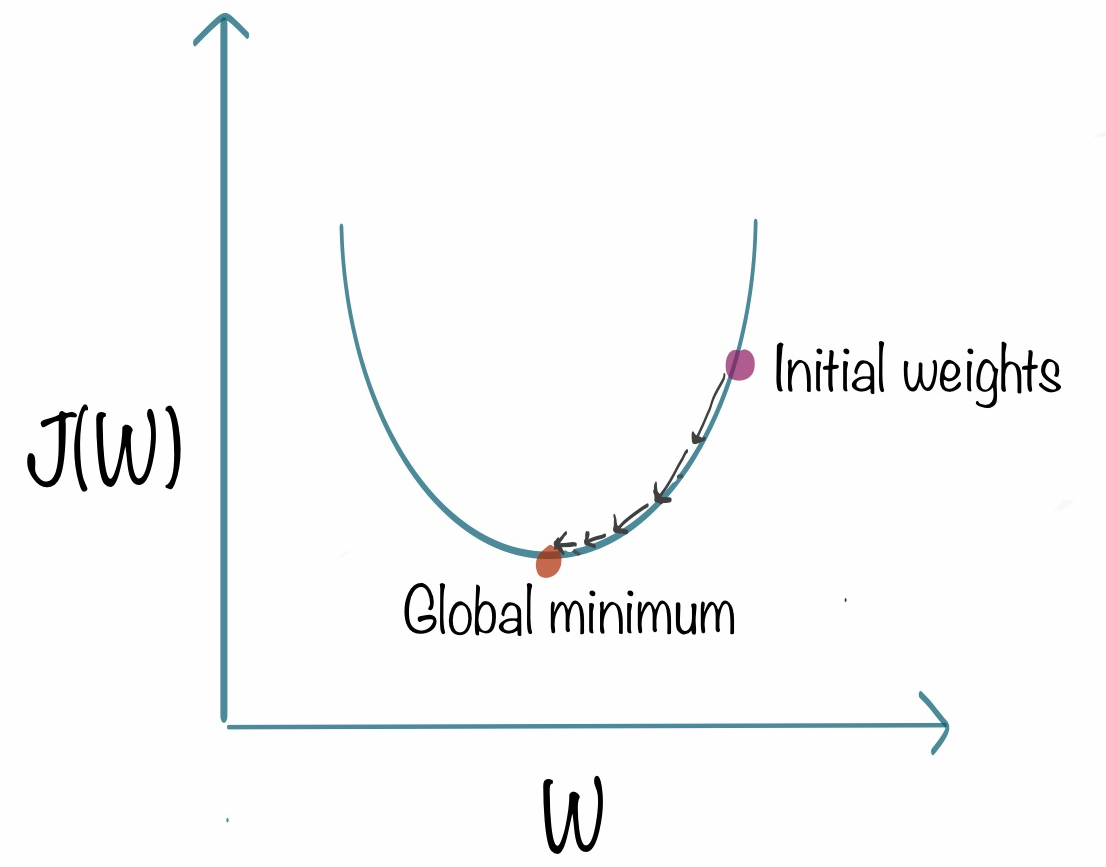

## The Algorithm

<p style="line-height:1.75;font-size:16px">
In its basic form, the gradient descent algorithm is remarkably simple:<br>
1\. Choose a starting point.<br>
2\. Compute the gradient (first order derivative) of the cost function at the current point.<br>
3\. Take a step in the opposite direction of the slope (go down).<br>
4\. Repeat until convergence.<br>
There are only some minor simplifications in this algorithm (we'll address this soon) but in a nutshell that's all there is to it.

## Learning Rate

<div style="line-height:1.75;background:#3464a2;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-question" style="font-size:40px;color:#e6f1ff;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#e6f1ff;padding:20px;border-radius:0px 0px 5px 5px">
You're at a certain point on the graph, you've calculated the gradient so you know the way down. How big of step should you take?<br>
</p></div>

<p style="line-height:1.75;font-size:16px">
The step size, or the distance we want to travel, is controlled by a parameter called the <b>learning rate</b>. The learning rate is simply a number which is multiplied by the gradient itself in order to calculate our step size - the larger the learning rate the larger the step.

<div style="line-height:1.75;background:#3464a2;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-question" style="font-size:40px;color:#e6f1ff;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#e6f1ff;padding:20px;border-radius:0px 0px 5px 5px">
What would you expect to see if our learning rate is big? And if it's small?<br>
</p></div>

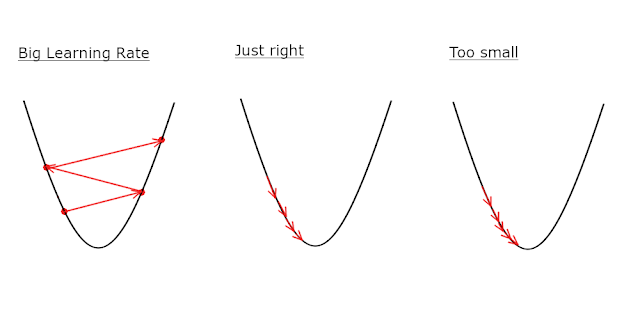

<p style="line-height:1.75;font-size:16px">
A learning rate that is too big might cause us to overshoot the target and in certain cases this will mean that we might not even converge to the minimum. So let's just make the learning rate small, right? Not quite. If our learning rate is very small it will take us much longer to converge and might make gradient descent infeasable for certain problems. Selecting a good learning rate is important when applying gradient descent but it is beyond the scope of this class.

<div style="line-height:1.75;background:#f6e609;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-lightbulb-o" style="font-size: 50px;color:#ffffcc;"></i>
</div>
<div>
<p style="line-height:1.75;background:#ffffcc;padding:20px;border-radius:0px 0px 5px 5px">
<span style="font-size:14px"><b>Choosing a Learning Rate</b></span><br>
As stated, choosing a good learning rate can make the difference between a model that converges quickly and a model that converges slowly or even doesn't converge. If you're interested in reading more on this topic check out  <a href=https://towardsdatascience.com/estimating-optimal-learning-rate-for-a-deep-neural-network-ce32f2556ce0>this post</a>. 
</p></div>

## Example By Hand

<p style="line-height:1.75;font-size:16px">
Let's take a simple cost function and try to find its minimum using gradient descent manually.<br>
I have the following function:<br>
<center><h3>
$y=(x+5)^2$
</h3>
</center>
<p style="line-height:1.75;font-size:16px">
Let's also plot it quickly:

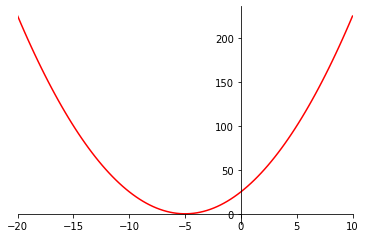

In [18]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.linspace(-20,10,100)
y = (x+5)**2

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(-20,10)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.plot(x, y, 'r')
plt.show()

<p style="line-height:1.75;font-size:16px">
We can easily see that the function's minimum point is at $x=5$. However, since this is a learning exercise we'll try to find it using gradient descent.<br>
<p style="line-height:1.75;font-size:16px">
<b>Step 1 - Choose Starting Point</b><bR>
Let's arbitrarily choose to start at $X_0=3$. While we're at it, let's also select a learning rate of $\alpha=0.01$.
<p style="line-height:1.75;font-size:16px">
<b>Step 2 - Calculate The Gradient</b><bR>
We now need to calculate the first order derivative of our function - let's do that.
<center>
<h3>
$y=(x+5)^2$
</h3>
<h3>
$\frac{dy}{dx}=\frac{d}{dx}(x+5)^2=2(x+5)$
</h3>
</center>
<p style="line-height:1.75;font-size:16px">
<b>Step 3 - Take a Step In the Down Direction</b><bR>
We said earlier that the step size is also determined by the learning rate so let's put it all together and calculate where we need to go:
<center>
<h3>
$X_1=X_0-\alpha\frac{dy}{dx}$
</h3>
<h3>
$X_1=3-0.01\cdot(2\cdot(3+5))=2.84$
</h3>
</center>
<p style="line-height:1.75;font-size:16px">
<b>Step 4 - Repeat Until Convergence</b><bR>
We see that our first step took us a bit closer to the minimum at $x=5$. Let's calculate another step:
<center>
<h3>
$X_2=X_1-\alpha\frac{dy}{dx}$
</h3>
<h3>
$X_2=2.84-0.01\cdot(2\cdot(2.84+5))=2.6832$
</h3>
</center>
<p style="line-height:1.75;font-size:16px">
Once again we can see that the $x$ value is slowly decreasing towards, hopefully, -5. 

<div style="line-height:1.75;background:#1e7b1e;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px"><i class="fa fa-pencil" style="font-size:40px;color:#c1f0c1;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#c1f0c1;padding:20px;border-radius:0px 0px 5px 5px">
Implement a function that performs gradient descent for the following cost function:
$y=4x^2 + 3x - 8$<br>
At each step, keep track of the cost function value so that you'll be able to plot it once the algorithm is done. Explore different learning rates, different starting points - how does that effect the algorithm?<bR>
Since we may get very close to the minimum without actually reaching it exactly, set a precision threshold so that if the current $x$ value is minus the previous value of $x$ is smaller than this threshold then we'll consider this as if the algorithm has converged. Also, make sure to put a maximum number of iterations in case the model doesn't converge.
</div>

Iteration 1 
X value is 2.73
Iteration 2 
X value is 2.4816
Iteration 3 
X value is 2.253072
Iteration 4 
X value is 2.04282624
Iteration 5 
X value is 1.8494001408
Iteration 6 
X value is 1.671448129536
Iteration 7 
X value is 1.50773227917312
Iteration 8 
X value is 1.3571136968392703
Iteration 9 
X value is 1.2185446010921286
Iteration 10 
X value is 1.0910610330047583
Iteration 11 
X value is 0.9737761503643776
Iteration 12 
X value is 0.8658740583352273
Iteration 13 
X value is 0.7666041336684092
Iteration 14 
X value is 0.6752758029749364
Iteration 15 
X value is 0.5912537387369414
Iteration 16 
X value is 0.5139534396379861
Iteration 17 
X value is 0.4428371644669472
Iteration 18 
X value is 0.3774101913095914
Iteration 19 
X value is 0.3172173760048241
Iteration 20 
X value is 0.26183998592443813
Iteration 21 
X value is 0.2108927870504831
Iteration 22 
X value is 0.16402136408644444
Iteration 23 
X value is 0.12089965495952888
Iteration 24 
X value is 0.08122768256276658
Itera

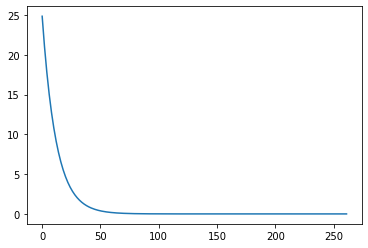

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

cur_x = 3                       # The algorithm starts at x=3
rate = 0.01                     # Learning rate
precision = 0.0000000001        # This tells us when to stop the algorithm
previous_step_size = 1 
max_iters = 10000               # Maximum number of iterations
iters = 0
df = lambda x: 8*x + 3          # Gradient of our function

cost = []
while previous_step_size > precision and iters < max_iters:
    prev_x = cur_x                           # Store current x value in prev_x
    cur_x = cur_x - rate * df(prev_x)        # Gradient descent
    cost.append(8*cur_x + 3)
    previous_step_size = abs(cur_x - prev_x) # Change in x
    iters = iters + 1 
    print("Iteration",iters,"\nX value is",cur_x) 
    
print("The local minimum occurs at", cur_x)

plt.plot(cost)
plt.show()

## SGDRegressor and SGDClassifier

<p style="line-height:1.75;font-size:16px">
Once again, sklearn to the rescue with it's own implementation of stochastic gradient descent for both regression and classification. They are not classification/regression methods by themselves but rather a wrapper for other linear methods such as logistic reression or SVM. Let's take a look at how `SGDClassifier` works on the iris dataset.

In [65]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = pd.Series(iris.target)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [120]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.85)

# If not specifically stated, SGDClassifier uses SVM by default
clf = SGDClassifier(max_iter=1000, tol=1e-3) 
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9130434782608695

<div style="line-height:1.75;background:#f6e609;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-lightbulb-o" style="font-size: 50px;color:#ffffcc;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#ffffcc;padding:20px;border-radius:0px 0px 5px 5px">
<span style="font-size:16px"><b>SGDClassifier Parameters</b></span><br>
SGDClassifier (and SGDRegressor) have many interesting parameters you can play with. Read more about them <a href=https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html>here</a>. 
</p></div>

<div style="line-height:1.75;background:#1e7b1e;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px"><i class="fa fa-pencil" style="font-size:40px;color:#c1f0c1;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#c1f0c1;padding:20px;border-radius:0px 0px 5px 5px">
Using SGDRegressor and the iris dataset, try to estimate the 'petal width (cm)' feature using the other features (without the target). Try to play with some of the parameters, what's the highest score you can achieve?
</div>

In [13]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

X = df.drop(['petal width (cm)'], axis=1)
y = df['petal width (cm)']

scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8)

clf = SGDRegressor(max_iter=1000, tol=1e-3)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8364892385421558

##  Types of Gradient Descent

<p style="line-height:1.75;font-size:16px">
Gradient descent is a term used liberally to describe the process we've talked about earlier but in reality there are three popular gradient descent variables which differ mostly by when they calculate the gradient. <br>
<p style="line-height:1.75;font-size:16px">
<b>Batch Gradient Descent</b><bR>
Batch gradient descent, also called vanilla gradient descent, calculates the error for each example within the training dataset, but only after all training examples have been evaluated does the model get updated. This whole process is like a cycle and it's called a training epoch.<br>
Some advantages of batch gradient descent are its computational efficient, it produces a stable error gradient and a stable convergence. Some disadvantages are the stable error gradient can sometimes result in a state of convergence that isn’t the best the model can achieve. It also requires the entire training dataset be in memory and available to the algorithm.
<p style="line-height:1.75;font-size:16px">
<b>Stochastic Gradient Descent</b><bR>
Stochastic gradient descent (SGD) does this for each training example within the dataset, meaning it updates the parameters for each training example one by one. Depending on the problem, this can make SGD faster than batch gradient descent. One advantage is the frequent updates allow us to have a pretty detailed rate of improvement.<bR>
The frequent updates, however, are more computationally expensive than the batch gradient descent approach. Additionally, the frequency of those updates can result in noisy gradients, which may cause the error rate to jump around instead of slowly decreasing.
<p style="line-height:1.75;font-size:16px">
<b>Mini-Batch Gradient Descent</b><bR>
Mini-batch gradient descent is the go-to method since it’s a combination of the concepts of SGD and batch gradient descent. It simply splits the training dataset into small batches and performs an update for each of those batches. This creates a balance between the robustness of stochastic gradient descent and the efficiency of batch gradient descent.